In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/CSE 544/Project

/content/drive/My Drive/CSE 544/Project


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

c. For this task, sum up the daily stats (cases and deaths) from the two states assigned to you. Assume day 1 is June 1st 2020. Assume the combined daily stats are Poisson distributed with parameter λ. Assume an Exponential prior (with mean β) on λ. Assume β = λ_MME where the MME is found using the first four weeks data (so the first 28 days of June 2020) as the sample data. Now, use the fifth week’s data (June 29 to July 5) to obtain the posterior for λ via Bayesian inference. Then, use the sixth week’s data to obtain the new posterior, using prior as posterior after week 5. Repeat till the end of week 8 (that is, repeat till you have posterior after using 8th week’s data). Plot all posterior distributions on one graph. Report the MAP for all posteriors.

Assume X ~ Exp(1/β), E[X] = β and Var(X) = β^2.

Assume random variable X ~ Pois(λ), E[X] = λ and Var(X) = λ.


In [4]:
def MME_Pois(data):
  lambda_est = np.mean(data)
  return lambda_est

In [30]:
### read data 
def read_combine_data_part_c(begin_date, periods, data_class):
  date_ranges = pd.date_range(start = begin_date, periods = periods)
  date_ranges_pd = date_ranges.to_frame(index=False, name="submission_date")

  file_name_AL = 'AL_' + data_class + '.csv'
  data_pd_AL = pd.read_csv(file_name_AL)
  data_pd_AL["submission_date"] = pd.to_datetime(data_pd_AL["submission_date"], format='%Y-%m-%d')
  data_mask_AL = (data_pd_AL["submission_date"] >= begin_date) & (data_pd_AL["submission_date"] < begin_date + pd.offsets.Day(periods))
  data_pd_AL = data_pd_AL.loc[data_mask_AL].rename(columns = {data_class: data_class + "_AL"})
  data_pd_AL = data_pd_AL[data_pd_AL[data_class + "_AL"] >= 0]

  file_name_AZ = 'AZ_' + data_class + '.csv'
  data_pd_AZ = pd.read_csv(file_name_AZ)
  data_pd_AZ["submission_date"] = pd.to_datetime(data_pd_AZ["submission_date"], format='%Y-%m-%d')
  data_mask_AZ = (data_pd_AZ["submission_date"] >= begin_date) & (data_pd_AZ["submission_date"] < begin_date + pd.offsets.Day(periods))
  data_pd_AZ = data_pd_AZ.loc[data_mask_AZ].rename(columns = {data_class: data_class + "_AZ"})
  data_pd_AZ = data_pd_AZ[data_pd_AZ[data_class + "_AZ"] >= 0]

  data_pd = pd.merge(date_ranges_pd, data_pd_AL, how = 'left', on = ["submission_date"])
  data_pd = pd.merge(data_pd, data_pd_AZ, how = 'left', on = ["submission_date"]).dropna()  ## drop nan values instead of setting 0
  data_pd[data_class] = data_pd[data_class + "_AL"] + data_pd[data_class + "_AZ"]
  
  data = data_pd[data_class].to_numpy()
  return data

In [6]:
def compute_plot_posterior(data_class, begin_x, end_x, interval_x=0.01):
  begin_date = pd.to_datetime('2020-06-01', format='%Y-%m-%d')

  ### prior
  data_prior = read_combine_data_part_c(begin_date, 28, data_class)
  lambda_MME = MME_Pois(data_prior)

  ### posterior for next weeks
  num_weeks = 4
  alpha = 1
  beta = 1 / lambda_MME

  x_axis = np.arange(begin_x, end_x, interval_x)
  print("For", data_class, ":")
  for i in range(num_weeks):
    data_posterior = read_combine_data_part_c(begin_date + pd.offsets.Day(28 + 7*i), 7, data_class)
    alpha = alpha + np.sum(data_posterior)
    beta = beta + data_posterior.shape[0]

    plt.plot(x_axis, gamma.pdf(x_axis, a = alpha, scale = 1/beta), label=str(i+5)+"th week")

    lambda_MAP = (alpha - 1) / beta
    print("After inputting ", i+5, "th week, MAP of lambda is: ", lambda_MAP)

  plt.title("Posterior Distribution")
  plt.xlabel("x value")
  plt.ylabel("pdf")
  plt.legend()
  plt.show()

  return

For new_case :
After inputting  5 th week, MAP of lambda is:  3681.108629698987
After inputting  6 th week, MAP of lambda is:  4261.131983302408
After inputting  7 th week, MAP of lambda is:  4298.797987952483
After inputting  8 th week, MAP of lambda is:  4257.009979089709


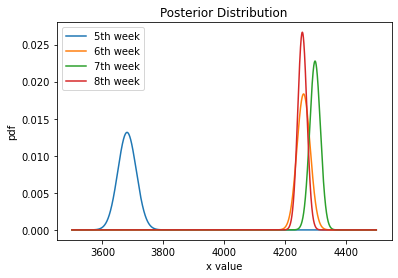

In [31]:
compute_plot_posterior("new_case", begin_x=3500, end_x=4500)

For pnew_case :
After inputting  5 th week, MAP of lambda is:  20.0931165757794
After inputting  6 th week, MAP of lambda is:  58.07097970536726
After inputting  7 th week, MAP of lambda is:  75.51008010934356
After inputting  8 th week, MAP of lambda is:  90.78564688904923


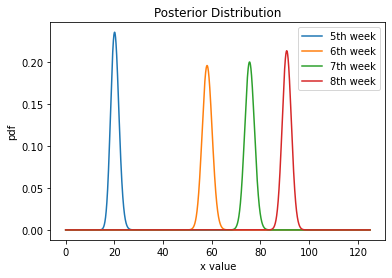

In [32]:
compute_plot_posterior("pnew_case", begin_x=0, end_x=125)

For new_death :
After inputting  5 th week, MAP of lambda is:  44.46989720998532
After inputting  6 th week, MAP of lambda is:  46.08627450980393
After inputting  7 th week, MAP of lambda is:  45.18005295675199
After inputting  8 th week, MAP of lambda is:  45.889245585874804


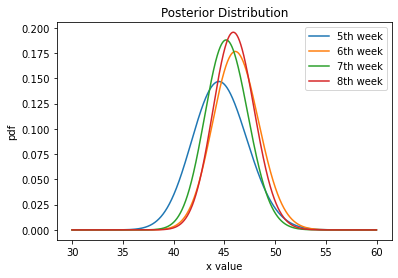

In [33]:
compute_plot_posterior("new_death", begin_x=30, end_x=60)

For pnew_death :
After inputting  5 th week, MAP of lambda is:  2.6335877862595423
After inputting  6 th week, MAP of lambda is:  2.650557620817844
After inputting  7 th week, MAP of lambda is:  3.1855955678670362
After inputting  8 th week, MAP of lambda is:  3.921455938697318


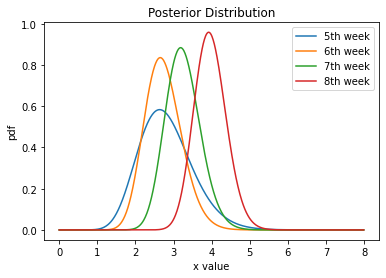

In [34]:
compute_plot_posterior("pnew_death", begin_x=0, end_x=8)